# Loading Preprocessed Data

In [5]:
# Loading
import pandas as pd
alzheimers_orig = pd.read_csv("data/alzheimers.csv")
alzheimers = pd.read_csv("data/alzheimers_encoded.csv")

# Exploration of Key Variables

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state = 1337)
alzheimers_resampled, alzheimers_resampled_class = rus.fit_resample(
    alzheimers_orig.drop("Alzheimer’s Diagnosis", axis=1),
    alzheimers_orig["Alzheimer’s Diagnosis"],
)
alzheimers_resampled = pd.concat([alzheimers_resampled, alzheimers_resampled_class], axis = 1)

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
63763,Spain,56,Male,14,34.4,Medium,Current,Regularly,No,No,...,Unhealthy,Low,Unemployed,Widowed,No,High,High,High,Rural,No
66358,France,56,Male,19,26.1,High,Never,Occasionally,Yes,No,...,Average,Low,Unemployed,Widowed,Yes,Low,Medium,Low,Rural,No
13429,South Korea,61,Female,4,30.4,Low,Current,Never,No,No,...,Healthy,Low,Unemployed,Married,No,High,Medium,High,Rural,No
41827,UK,63,Female,1,21.1,Medium,Never,Never,No,No,...,Unhealthy,Medium,Unemployed,Married,No,Medium,Low,Low,Urban,No
23847,Germany,65,Female,8,24.1,High,Former,Never,No,No,...,Healthy,High,Retired,Single,No,High,High,Low,Rural,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74256,Mexico,87,Male,13,21.3,Low,Never,Never,No,Yes,...,Healthy,High,Retired,Single,No,Low,Low,Medium,Rural,Yes
74264,Saudi Arabia,82,Female,12,32.0,Low,Former,Never,Yes,Yes,...,Average,High,Employed,Married,Yes,Low,Medium,Medium,Urban,Yes
74268,Saudi Arabia,72,Male,13,30.4,High,Former,Occasionally,No,Yes,...,Unhealthy,Medium,Employed,Widowed,No,High,Medium,Low,Rural,Yes
74269,Saudi Arabia,82,Female,16,27.8,High,Never,Regularly,No,No,...,Healthy,Low,Unemployed,Widowed,Yes,Low,Low,Medium,Urban,Yes


## Bivariate analysis / Distribution with target variable analysis

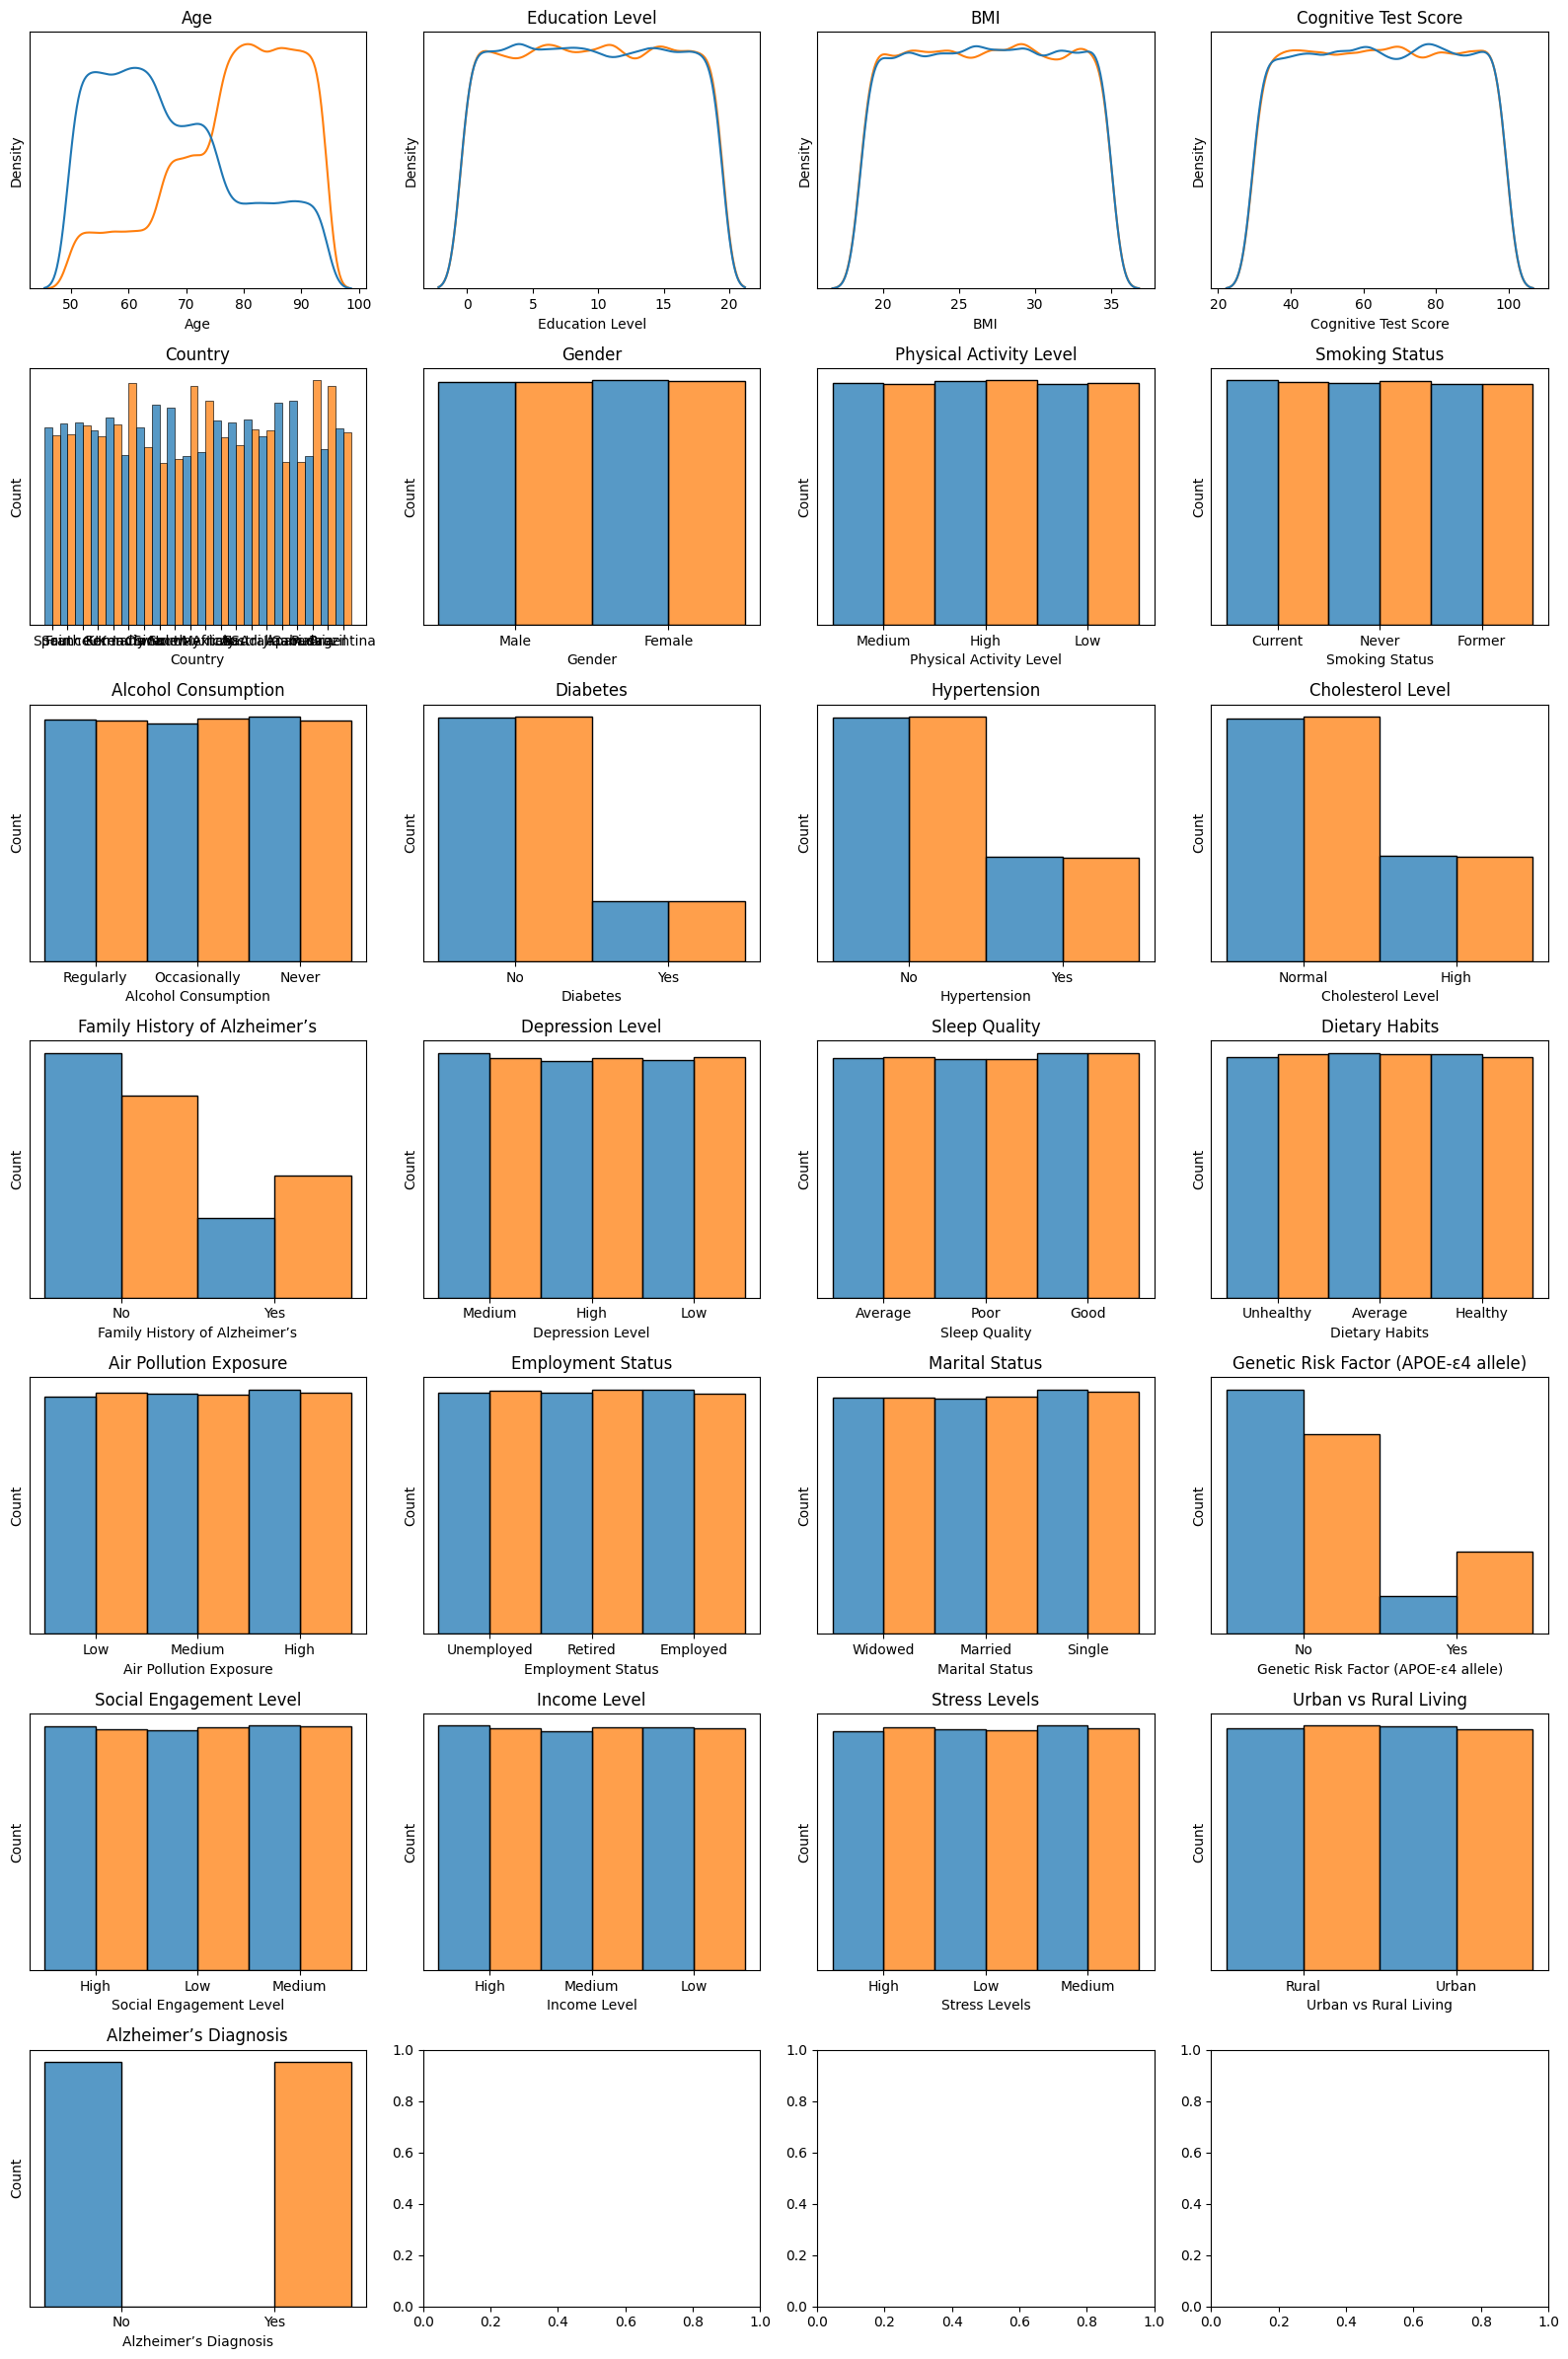

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(7, 4, figsize=(16, 24))
axes: list[plt.Axes] = axes.ravel()

def plot_kdeplot_bivariate(x, ax: plt.Axes):
    sns.kdeplot(
        data = alzheimers_resampled,
        x = x,
        hue = 'Alzheimer’s Diagnosis',
        ax = ax,
        legend = False
    )
    ax.set_title(x)
    ax.set_yticks([], [])

def plot_histplot_bivariate(x, ax: plt.Axes):
    sns.histplot(
        data = alzheimers_resampled,
        x = x,
        hue = 'Alzheimer’s Diagnosis',
        ax = ax,
        multiple = 'dodge',
        legend = False
    )
    ax.set_title(x)
    ax.set_yticks([], [])

# Numerical ones first
numerical_columns = list(alzheimers_orig.select_dtypes(include = 'number').columns)
categorical_columns = list(alzheimers_orig.select_dtypes(include = 'object').columns)
# print(categorical_columns)

ax_idx = 0
for numerical_column in numerical_columns:
    plot_kdeplot_bivariate(numerical_column, axes[ax_idx])
    ax_idx += 1

for categorical_column in categorical_columns:
    plot_histplot_bivariate(categorical_column, axes[ax_idx])
    ax_idx += 1

# ... Finish plotting

plt.tight_layout()
plt.show()


From bivariate distribution qualitative analysis, we see that most attributes have no visual correlation with the target. Of our attributes, the visually distinctive are:
- Age
- Family History of Alzheimer's
- Genetic Risk Factor (APOE-ε4 allele)

# Modeling

In [96]:
alzheimers[['Age', 'BMI', 'Cognitive_Test_Score', 'Education_Level', 'Genetic_Risk_Factor_(APOE-ε4_allele)_Yes']]

,Age,BMI,Cognitive_Test_Score,Education_Level,Genetic_Risk_Factor_(APOE-ε4_allele)_Yes
0,1.389398,1.305314,1.257660,-1.474299,0.0
1,0.002719,0.654689,0.017157,-0.432087,0.0
2,1.081247,-0.814465,-1.074486,1.652339,0.0
3,-1.460997,0.927532,0.811079,1.304935,0.0
4,-1.075808,0.675677,-0.776765,-1.126895,0.0
...,...,...,...,...,...
74278,-0.921733,-0.877429,-1.124106,-1.126895,0.0
74279,-1.075808,0.801604,-1.124106,1.478637,0.0
74280,-1.152846,0.297894,-0.181324,0.610126,1.0
74281,0.079757,0.465798,1.605001,-0.432087,0.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
import time

drop_columns = ["Alzheimers_Diagnosis_Yes"]
drop_columns += [col for col in alzheimers.columns if "Country" in col] # Drop Country
drop_columns += [col for col in alzheimers.columns if "Sleep_Quality" in col] # Sleep Quality
drop_columns += [col for col in alzheimers.columns if "Air_Pollution_Exposure" in col] # Air Pollution Exposure

alz_train, alz_test, alz_train_y, alz_test_y = train_test_split(
    alzheimers.drop(drop_columns, axis=1),
    # alzheimers[['Age', 'BMI', 'Cognitive_Test_Score', 'Education_Level', 'Genetic_Risk_Factor_(APOE-ε4_allele)_Yes']],
    alzheimers["Alzheimers_Diagnosis_Yes"],
    train_size=0.8,
    random_state=1337
)

start_time = time.perf_counter()

rf_model = RandomForestClassifier()
rf_model.fit(alz_train, alz_train_y)
rf_predictions = rf_model.predict(alz_test)

end_time = time.perf_counter()

rf_accuracy = accuracy_score(alz_test_y, rf_predictions)
rf_precision = precision_score(alz_test_y, rf_predictions)

print("Time taken:", end_time - start_time, "(s)")
print("Accuracy of RF model:", rf_accuracy)
print("Precision of RF model:", rf_precision)


Time taken: 11.541078399997787 (s)
Accuracy of RF model: 0.7189203742343676
Precision of RF model: 0.6704055220017257
Train accuracy of RF model: 1.0
Train precision of RF model: 1.0


In [98]:
# Extract feature importances
importances = rf_model.feature_importances_

# Pair each feature with its importance
feature_names = alz_train.columns
feature_importance_dict = dict(zip(feature_names, importances))

sorted_feature_importance = dict(
    sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)
)

# Print sorted feature importances
for feature, importance in sorted_feature_importance.items():
    print(f"{feature}: {importance:.4f}")

Age: 0.2700
BMI: 0.1049
Cognitive_Test_Score: 0.0994
Education_Level: 0.0792
Genetic_Risk_Factor_(APOE-ε4_allele)_Yes: 0.0368
Alcohol_Consumption: 0.0306
Depression_Level: 0.0302
Physical_Activity_Level: 0.0299
Income_Level: 0.0298
Social_Engagement_Level: 0.0297
Stress_Levels: 0.0297
Dietary_Habits: 0.0285
Family_History_of_Alzheimers_Yes: 0.0235
Gender_Male: 0.0188
Urban_vs_Rural_Living_Urban: 0.0183
Cholesterol_Level: 0.0167
Hypertension_Yes: 0.0164
Marital_Status_Widowed: 0.0158
Marital_Status_Single: 0.0158
Smoking_Status_Former: 0.0157
Smoking_Status_Never: 0.0157
Employment_Status_Unemployed: 0.0154
Employment_Status_Retired: 0.0153
Diabetes_Yes: 0.0138


In [ ]:
import xgboost as xgb

start_time = time.perf_counter()

xgb_model = xgb.XGBClassifier(eval_metric = 'logloss')
xgb_model.fit(
    alzheimers[['Age', 'BMI', 'Cognitive_Test_Score', 'Education_Level', 'Genetic_Risk_Factor_(APOE-ε4_allele)_Yes']], 
    alz_train_y
)
xgb_predictions = xgb_model.predict(alz_test)

end_time = time.perf_counter()

xgb_accuracy = accuracy_score(alz_test_y, xgb_predictions)
xgb_precision = precision_score(alz_test_y, xgb_predictions)

print("Time taken:", end_time - start_time, "(s)")
print("Accuracy of RF model:", xgb_accuracy)
print("Precision of RF model:", xgb_precision)

Time taken: 0.6607006000012916 (s)
Accuracy of RF model: 0.7173435045995064
Precision of RF model: 0.664532357649211


In [97]:
alzheimers.columns

Index(['Age', 'Education_Level', 'BMI', 'Cognitive_Test_Score',
       'Physical_Activity_Level', 'Alcohol_Consumption', 'Cholesterol_Level',
       'Depression_Level', 'Sleep_Quality', 'Dietary_Habits',
       'Air_Pollution_Exposure', 'Social_Engagement_Level', 'Income_Level',
       'Stress_Levels', 'Country_Australia', 'Country_Brazil',
       'Country_Canada', 'Country_China', 'Country_France', 'Country_Germany',
       'Country_India', 'Country_Italy', 'Country_Japan', 'Country_Mexico',
       'Country_Norway', 'Country_Russia', 'Country_Saudi_Arabia',
       'Country_South_Africa', 'Country_South_Korea', 'Country_Spain',
       'Country_Sweden', 'Country_UK', 'Country_USA', 'Smoking_Status_Former',
       'Smoking_Status_Never', 'Employment_Status_Retired',
       'Employment_Status_Unemployed', 'Marital_Status_Single',
       'Marital_Status_Widowed', 'Gender_Male', 'Diabetes_Yes',
       'Hypertension_Yes', 'Family_History_of_Alzheimers_Yes',
       'Genetic_Risk_Factor_(APOE-